In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import pylab
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.metrics import accuracy_score, confusion_matrix,  f1_score, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV

In [2]:
df=pd.read_csv("/content/Salary_dataset.csv")

In [3]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [5]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [6]:
df.isnull().sum()/len(df)*100

,0
Unnamed: 0,0.0
YearsExperience,0.0
Salary,0.0


In [7]:
print(df.duplicated().sum()/len(df)*100)

0.0


In [8]:
df.tail()

,Unnamed: 0,YearsExperience,Salary
25,25,9.1,105583.0
26,26,9.6,116970.0
27,27,9.7,112636.0
28,28,10.4,122392.0
29,29,10.6,121873.0


# label encoding for target feature

In [9]:
y = df['Salary']

In [10]:
print(df.columns)

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')


In [11]:
X = df[['YearsExperience']]
df = df.drop('Unnamed: 0', axis=1)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

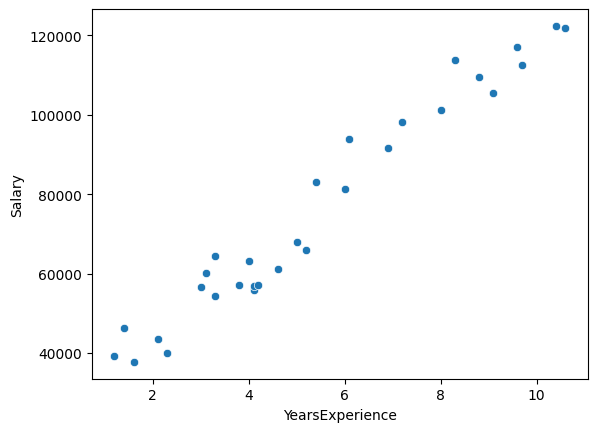

In [12]:
sns.scatterplot(x='YearsExperience', y='Salary', data=df)

In [13]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
DT= DecisionTreeRegressor()

In [15]:
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [16]:
y_pred=DT.predict(x_test)

In [17]:
y_pred_train=DT.predict(x_train)

In [18]:
accuracy_score(y_pred,y_test)

0.0

In [19]:
r2_score(y_pred_train,y_train)

0.9999631306343537

In [20]:
cm=confusion_matrix(y_pred,y_test)

<Axes: >

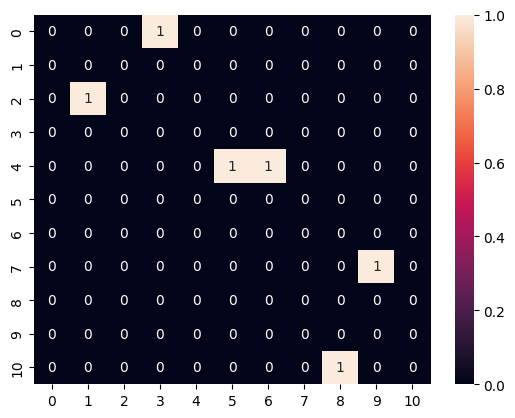

In [21]:
sns.heatmap(cm,annot=True)

In [22]:
f1_score(y_pred,y_test,average='weighted')

0.0

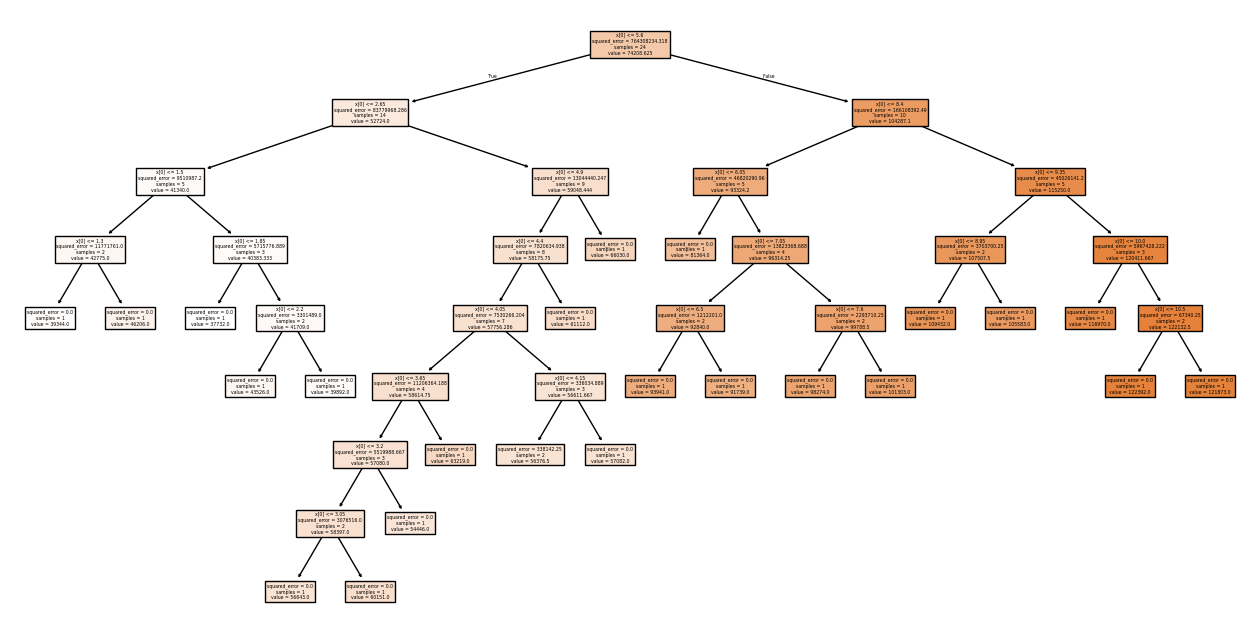

In [23]:
plt.figure(figsize=(16,8))
tree.plot_tree(DT,filled=True)
plt.show()

# Hyperprarmeter tunning for Decison Tree Classifier

In [24]:
dt=DecisionTreeRegressor()

In [25]:
grid_param ={'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
            'max_depth': range(2,32,1),
            'min_samples_leaf': range(1,10,1),
            'min_samples_split': range(2,10,1),
            'splitter': ['best', 'random']}

In [26]:
grid_search= GridSearchCV(estimator=dt,param_grid=grid_param,cv=5,n_jobs =-1)

In [27]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [28]:
grid_search.best_score_

np.float64(0.9466213058146196)

In [29]:
grid_search.best_params_

{'criterion': 'poisson',
 'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'splitter': 'random'}

In [30]:
treemodel= DecisionTreeClassifier(criterion= 'gini',
 max_depth= 19,
 min_samples_leaf= 4,
 min_samples_split= 9,
 splitter= 'random')

In [31]:
treemodel.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=19, min_samples_leaf=4, min_samples_split=9,
                       splitter='random')

In [32]:
y_pred=treemodel.predict(x_test)

In [33]:
y_pred_train=treemodel.predict(x_train)

In [34]:
accuracy_score(y_pred,y_test)

0.0

In [35]:
accuracy_score(y_pred_train,y_train)

0.125

In [36]:
cm=confusion_matrix(y_pred,y_test)

<Axes: >

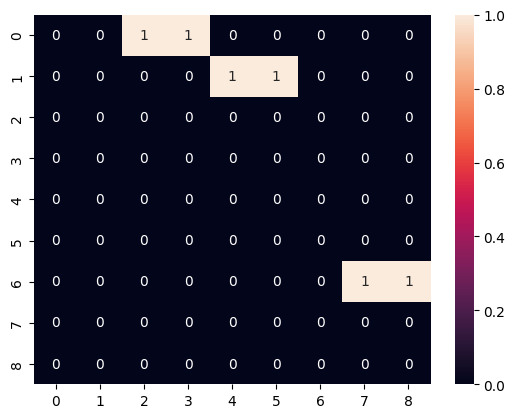

In [37]:
sns.heatmap(cm,annot=True)